## 회귀 (Regression)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/fish.csv')

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:
cond = df['Species'] == 'Perch'
perch_data = df.loc[cond]

In [10]:
perch_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


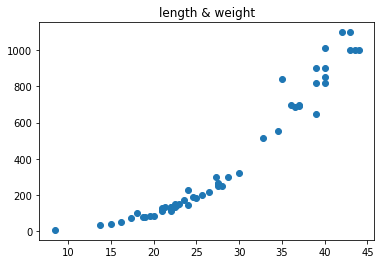

In [13]:
import matplotlib.pyplot as plt

plt.scatter(perch_data['Length2'], perch_data['Weight'])
plt.title('length & weight')
plt.show()

- 무게를 예측하는 것이 목표임

In [15]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
X_train, X_test, y_train, y_test = train_test_split(perch_data[['Length2']], perch_data[['Weight']], random_state=42)

In [74]:
knn_reg = KNeighborsRegressor()

In [75]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

### R결정계수

In [76]:
knn_reg.score(X_test, y_test)

0.992809406101064

In [77]:
knn_reg.score(X_train, y_train)

0.9698823289099254

In [87]:
train_score_list = []
test_score_list = []
for i in range(1,11):
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train, y_train)
    test_score = knn_reg.score(X_test, y_test)
    train_score = knn_reg.score(X_train, y_train)
    test_score_list.append(test_score)
    train_score_list.append(train_score)
    print(f'k_neighbors {i}일 때 train_score는 {train_score}, test_score는 {test_score}입니다.')

k_neighbors 1일 때 train_score는 0.9852830341215901, test_score는 0.991309195814175입니다.
k_neighbors 2일 때 train_score는 0.9828437127041165, test_score는 0.9725010241788556입니다.
k_neighbors 3일 때 train_score는 0.9804899950518966, test_score는 0.9746459963987609입니다.
k_neighbors 4일 때 train_score는 0.978211389719245, test_score는 0.9840231023848637입니다.
k_neighbors 5일 때 train_score는 0.9698823289099254, test_score는 0.992809406101064입니다.
k_neighbors 6일 때 train_score는 0.9757140960298665, test_score는 0.9855001139899048입니다.
k_neighbors 7일 때 train_score는 0.9761170732051527, test_score는 0.9781383949643516입니다.
k_neighbors 8일 때 train_score는 0.9697604397763201, test_score는 0.9780541148735824입니다.
k_neighbors 9일 때 train_score는 0.9693310367551284, test_score는 0.9692647749722698입니다.
k_neighbors 10일 때 train_score는 0.96164569026043, test_score는 0.9737908255822255입니다.


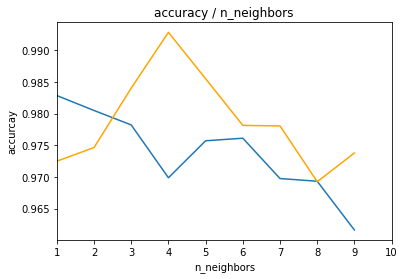

In [88]:
import seaborn as sns
sns.lineplot(train_score_list)
sns.lineplot(test_score_list, color='orange')
plt.xlabel('n_neighbors')
plt.xlim(1,10)
plt.ylabel('accurcay')
plt.title('accuracy / n_neighbors')
plt.show()

In [ ]:
-n_neighbors 4에서는 과대적합되었다는 것을 알 수 있음. 